# Exploratory Data Analysis (EDA) 

### Data Analysis of Hunter's E-Grocery supermarket

collaborator: Kalam Park

Kaggle file description: 
- Hunter's e-grocery is a renowned up-and-coming new generation lifestyle brand. We have our brand presence in 10 counties and are always looking for new ways to improve and anticipate our customer needs. black swan events like Covid-19, Ukraine war, Gas shortage has definitely impacted the way our customers shop in our store. Please use the dataset to propose business value for informative based decision making.
- ten initial classes (more were added during analysis)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from functions import order_time, time_split, order_time_general, days_past, number_cart_order

In [2]:
df=pd.read_csv('data/ECommerce_consumer behaviour.csv')
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [4]:
df.isna().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [5]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [6]:
df['days_since_prior_order'] = df['days_since_prior_order'].fillna('0')
df['days_since_prior_order']=df['days_since_prior_order'].astype(int)

In [7]:
df.isna().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [8]:
# Create a dictionary mapping the integers to the day of the week names
dow_map = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}

# Use the map method to map the integer values to the day of the week names
df['order_dow'] = df['order_dow'].map(dow_map)

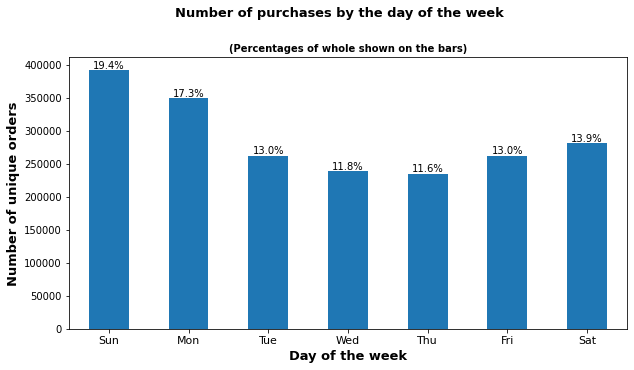

In [9]:
# Calculate the number of purchases for each day of the week
counts = df['order_dow'].value_counts().reindex(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

# Calculate the percentage of the whole for each value
percentages = counts / counts.sum()

# Create the bar plot
ax = counts.plot.bar(figsize=(10, 5))

# Add the percentage labels to the plot
for i, value in enumerate(counts.values):
    ax.text(i, value, f"{percentages[i]:.1%}", ha='center', va='bottom')

# Make the x-axis tick labels vertical
plt.xticks(fontsize=11, rotation='horizontal')
# Add a title to the plot
plt.suptitle('Number of purchases by the day of the week', y=1.02, fontweight='bold', fontsize=13)
# Add a subtitle to the plot
plt.title('(Percentages of whole shown on the bars)', fontsize=10, fontweight='bold')
plt.ylabel('Number of unique orders', fontweight='bold', fontsize=13)
plt.xlabel('Day of the week', fontweight='bold', fontsize=13);


In [10]:
df['time_of_day'] = df['order_hour_of_day'].apply(order_time)

In [11]:
counts = df['time_of_day'].value_counts()

In [12]:
counts = counts.reindex(['12', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])

In [13]:
df['time_am_pm']=df['order_hour_of_day'].apply(time_split)

In [14]:
pivot = df.pivot_table(index='time_of_day', columns='time_am_pm', values='user_id', aggfunc=['count'])

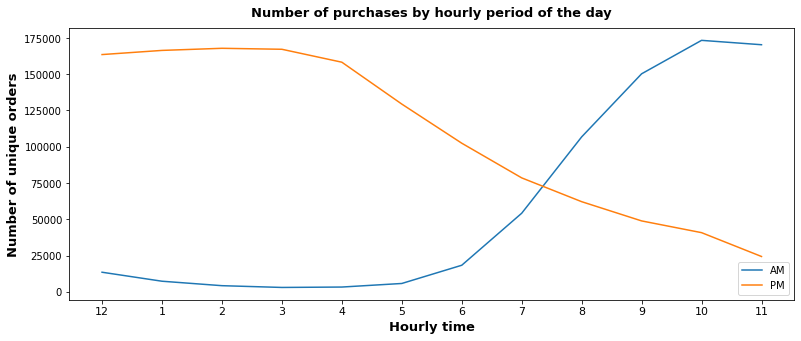

In [15]:
pivot = pivot.reindex(['12', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])
ax = pivot.plot(figsize=(13,5), kind='line')
# Make the x-axis tick labels vertical
plt.xticks(np.arange(12), pivot.index, rotation='horizontal', fontsize=11);# Add a title to the plot
plt.title('Number of purchases by hourly period of the day', y=1.02, fontweight='bold', fontsize=13)
# Add a subtitle to the plot
plt.xlabel('Hourly time', fontweight='bold', fontsize=13)
plt.ylabel('Number of unique orders', fontweight='bold', fontsize=13)
ax.legend(['AM', 'PM'])

# Show the plot
plt.show()

In [16]:
df['order_time_general']=df['order_hour_of_day'].apply(order_time_general)

In [17]:
pivot = df.pivot_table(index='order_dow', columns='order_time_general', values='user_id', aggfunc=['count'])

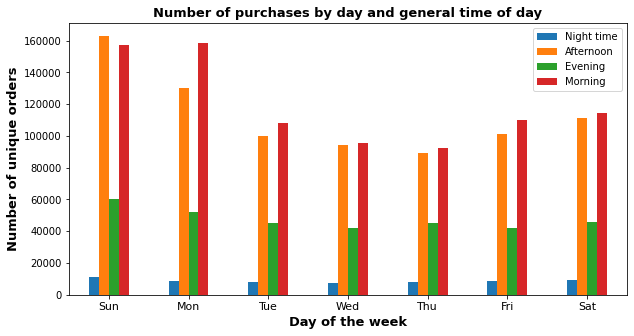

In [18]:
pivot = pivot.reindex(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

ax = pivot.plot(figsize=(10,5), kind='bar')
ax.set_title('Number of purchases by day and general time of day', fontweight='bold', fontsize=13)
ax.set_xlabel('Day of the week', fontweight='bold', fontsize=13)
ax.set_ylabel('Number of unique orders', fontweight='bold', fontsize=13)
ax.legend(['Night time', 'Afternoon', 'Evening', 'Morning'])
plt.xticks(rotation='horizontal', fontsize=11);

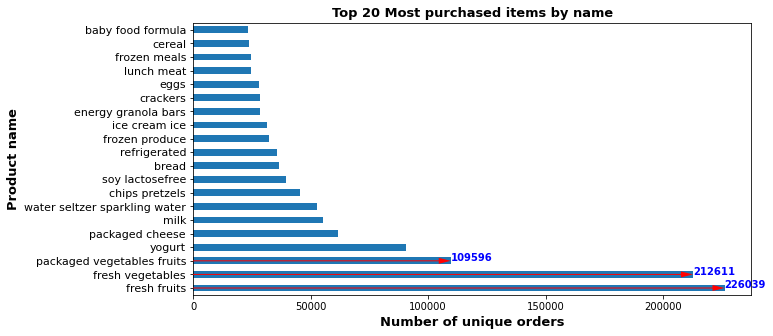

In [19]:
counts = df['product_name'].value_counts().head(20)
# Plot the counts as a bar plot
ax = counts.plot.barh()

# Customize the plot
ax = counts.plot.barh(figsize=(10,5))  # Increase the bar height
ax.set_title('Top 20 Most purchased items by name', fontweight='bold', fontsize=13)
ax.set_ylabel('Product name', fontweight='bold', fontsize=13)
ax.set_xlabel('Number of unique orders', fontweight='bold', fontsize=13)
plt.yticks(rotation='horizontal', fontsize=11)

# Add text labels to the first three bars
for i, v in enumerate(counts[:3]):
    ax.text(v + 0.1, i, str(v), color='blue', fontweight='bold')
    ax.annotate('', xy=(v, i), xytext=(0, i), arrowprops=dict(facecolor='red', edgecolor='none', width=1, headwidth=6))

# Show the plot
plt.show()

In [20]:
df['days_past']=df['days_since_prior_order'].apply(days_past)

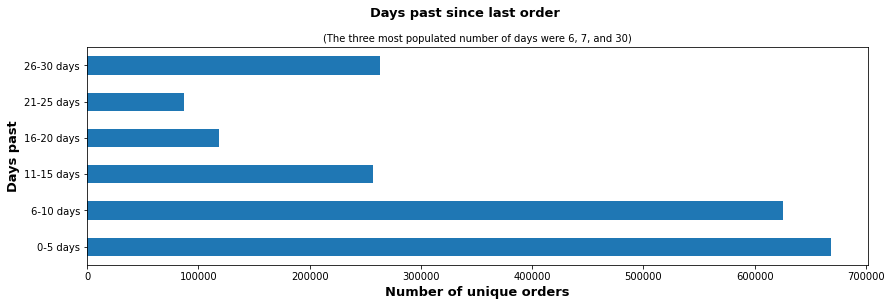

In [21]:
counts = df['days_past'].value_counts()
counts = counts.reindex(['0-5 days', '6-10 days', '11-15 days', '16-20 days', '21-25 days', '26-30 days'])
ax = counts.plot.barh()

# Customize the plot
ax = counts.plot.barh(figsize= (14, 4))  # Increase the bar width

plt.xticks(rotation='horizontal', fontsize=10)

# Add a title to the plot
plt.suptitle('Days past since last order', y=1.02, fontweight='bold', fontsize=13)

ax.set_ylabel('Days past', fontweight='bold', fontsize=13)
ax.set_xlabel('Number of unique orders', fontweight='bold', fontsize=13)

# Find the top three highest count bars
top_three = counts.nlargest(3)
plt.title('(The three most populated number of days were 6, 7, and 30)', fontsize=10)


# Show the plot
plt.show()

In [22]:
df['number_cart_order']=df['add_to_cart_order'].apply(number_cart_order)

1-5 orders       886340
6-10 orders      554057
11-15 orders     295293
16-20 orders     149450
21-25 orders      72332
26-35 orders      48902
35-100 orders     13127
Name: number_cart_order, dtype: int64


/Users/kalampark/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


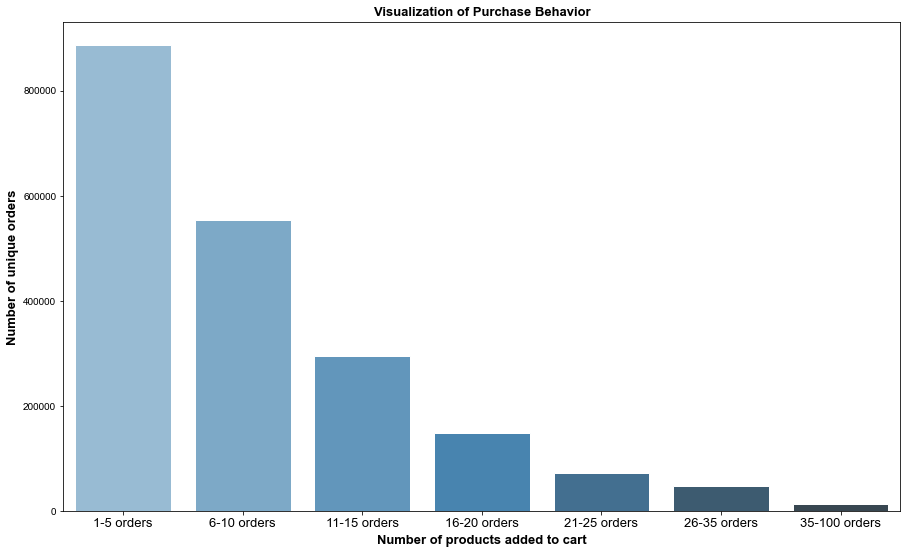

In [23]:
grouped = df['number_cart_order'].value_counts()
print(grouped)
f, ax = plt.subplots(figsize=(15, 9))
sns.set_style('darkgrid')
plt.xticks(rotation='horizontal', fontsize=13)
sns.barplot(grouped.index, grouped.values, palette='Blues_d')
plt.title('Visualization of Purchase Behavior', fontsize=13, fontweight='bold')
plt.ylabel('Number of unique orders', fontsize=13, fontweight='bold')
plt.xlabel('Number of products added to cart', fontsize=13, fontweight='bold')
plt.show()

/Users/kalampark/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


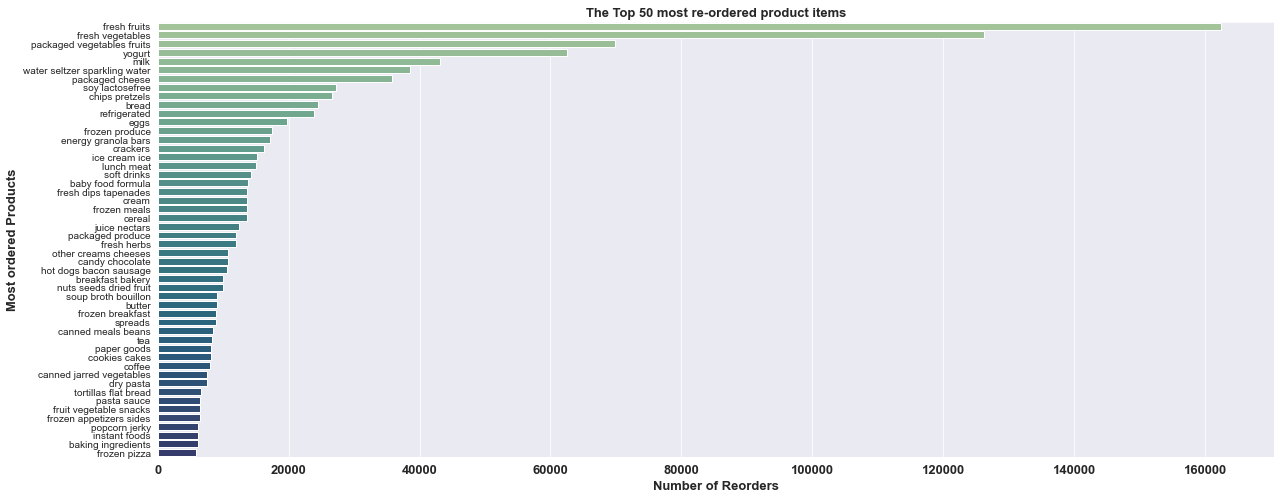

In [24]:
grouped  = df.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)
grouped = grouped[:50]
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(20, 8))
plt.xticks(rotation='horizontal', fontweight='bold', fontsize=13)
sns.barplot(grouped.values, grouped.index, palette='crest', orient='h')
plt.title('The Top 50 most re-ordered product items', fontsize=13, fontweight='bold')
plt.xlabel('Number of Reorders', fontsize=13, fontweight='bold')
plt.ylabel('Most ordered Products', fontsize=13, fontweight='bold')
plt.show()

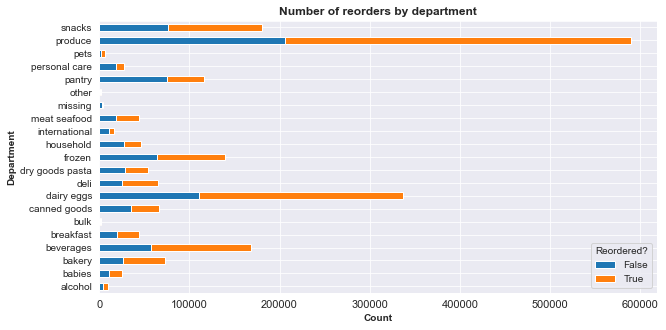

In [25]:
# Create a pivot table to calculate the proportion of reorders and non-reorders for each department
table = pd.pivot_table(df, index='department', columns='reordered', values='user_id', aggfunc='count')

# Plot the pivot table as a stacked bar plot
table.plot.barh(stacked=True, figsize=(10,5))

# Customize the plot
plt.xticks(rotation='horizontal', fontsize=11)
plt.ylabel('Department', fontweight='bold')  # Set the x-axis label
plt.xlabel('Count', fontweight='bold')  # Set the y-axis label
plt.title('Number of reorders by department', fontweight='bold')  # Set the title
plt.legend(['False', 'True'], title='Reordered?')

# Show the plot
plt.show()

In [26]:
df_factorized = df.copy()
df_factorized['department']=pd.factorize(df_factorized.department)[0]
df_factorized['product_name']=pd.factorize(df_factorized.product_name)[0]
df_factorized['order_hour_of_day']=pd.factorize(df_factorized.order_hour_of_day)[0]
df_factorized['order_time_general']=pd.factorize(df_factorized.order_time_general)[0]

<AxesSubplot: >

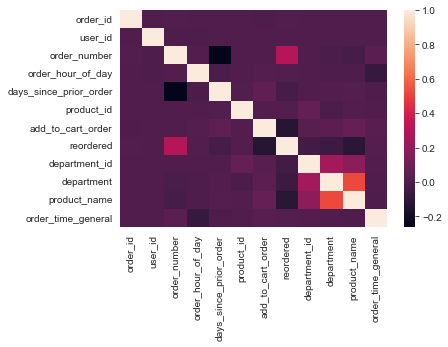

In [27]:
sns.heatmap(df_factorized.corr())

In [28]:
df.to_csv('main_df.csv')